# Lecture 6: Simple Models for Chaos and he logistic map

**Overview:**
* Revisit phase space plot and Poincare Map.
* Properties of the Logistic Map.


---

## Blackboard notes: 
### Logistic map: 
A discrete mapping, defined: 
$$ x_{n+1} = \mu x_n (1-x_n) $$
For $0\leq x_n \leq 1$,  $0<\mu \leq 4$. 

This function, $f(x)=\mu x(1-x)$, has max x=0.5, $f(0.5)=\mu / 4$. 
$$ x_1=f(x_0) $$
$$ x_2=f(x_1) = f(f(x_0)) = f^{(2)}(x_0) $$
$$ x_n=f^{(n)}(x_0) $$

We can have fixed points in a logistic map. A period 1 fixed point is where $f(x^*)=x^*$:
$$x^*=\mux^* (1-x^*)$$
$$x^*,  1-\frac{1}{\mu}$$
Similarly, a period 2 fixed point is: 
$$x^* = f^{(2)}(x^*)$$
$$x^* =0, 1-\frac{1}{\mu}$$
$$ 1 + \frac{\mu\pm \sqrt{\mu^2 + 2\mu -3}}{2\mu} \,\,\, \text{when } \mu\geq3$$
We can also locate fixed points graphically:


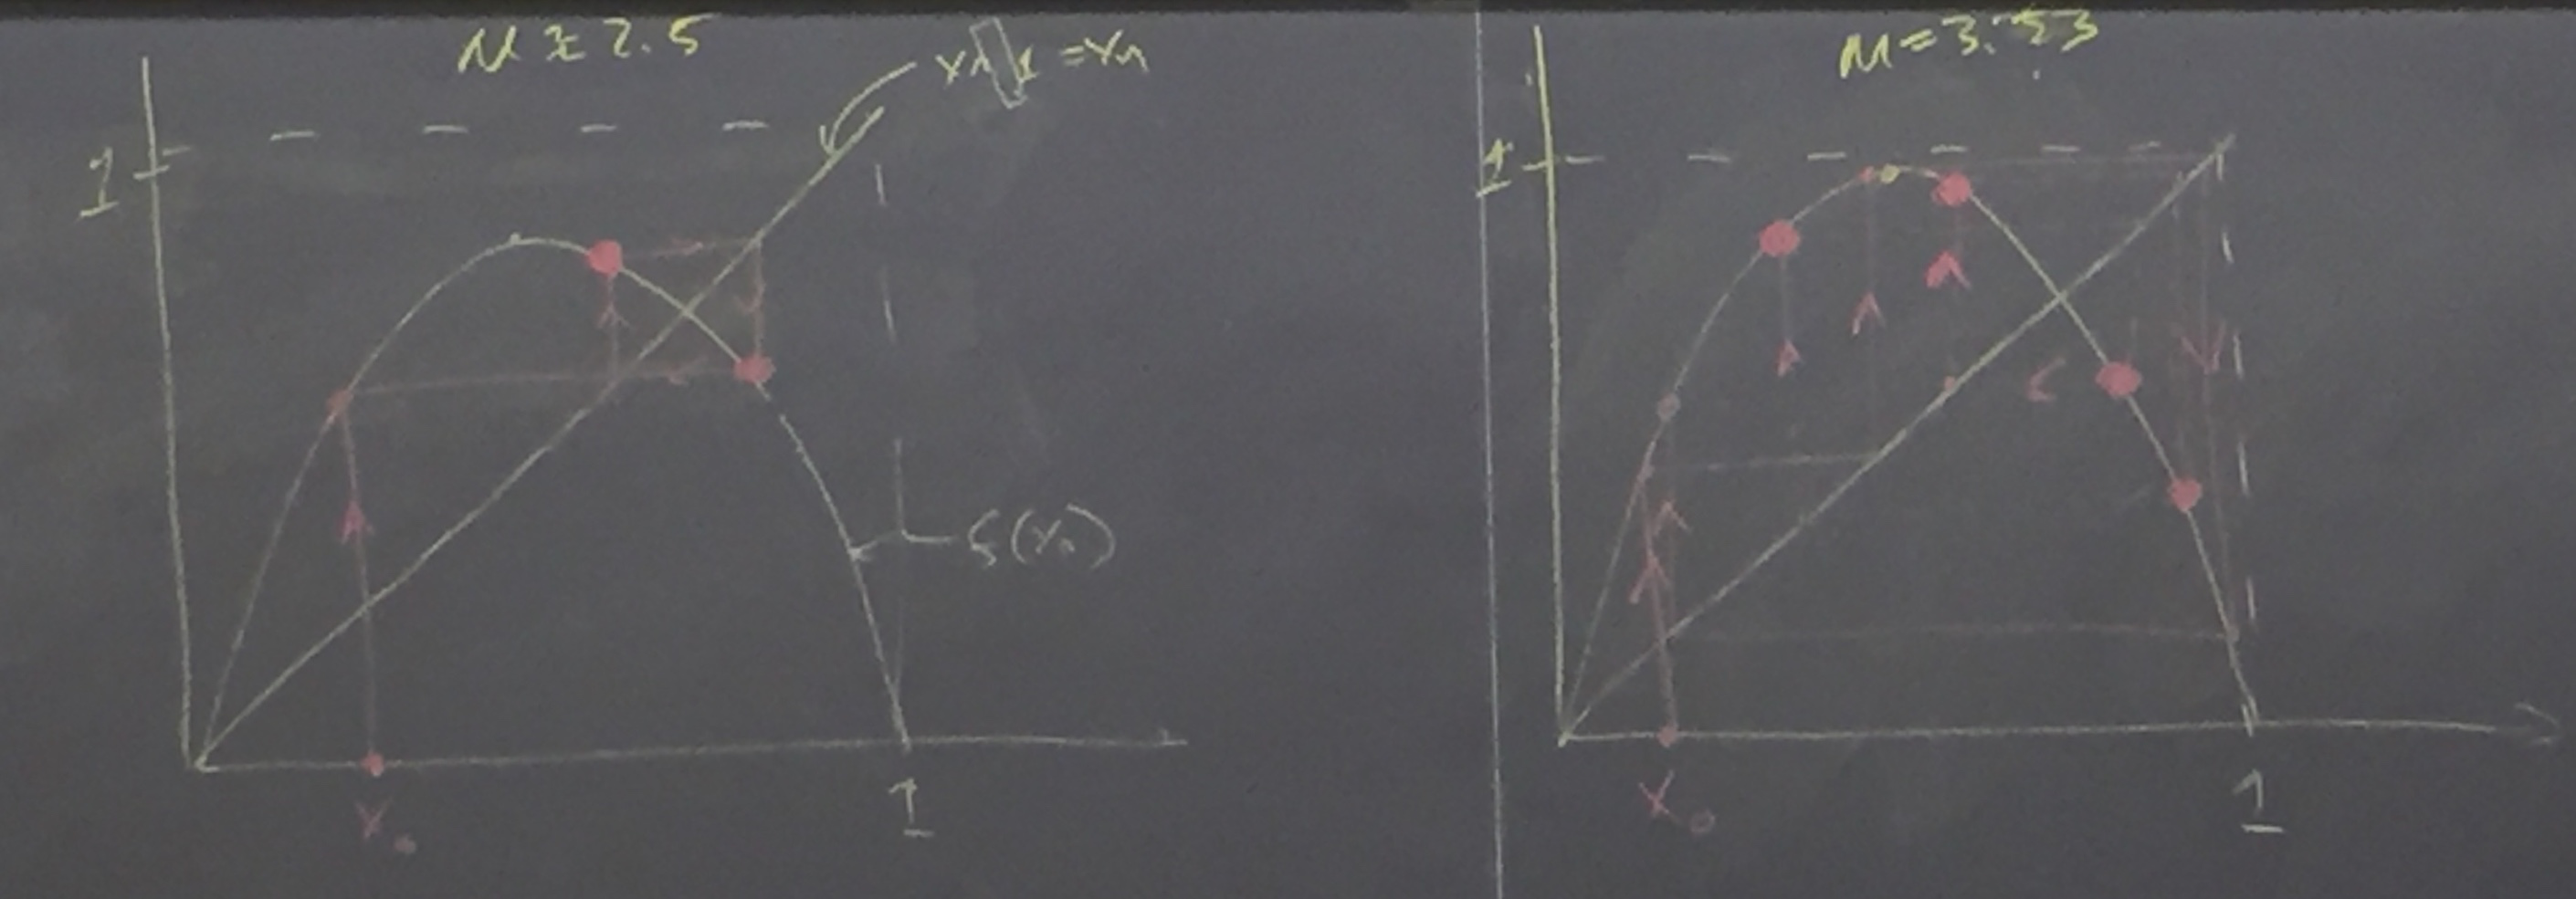

In [11]:
from IPython.display import display
from PIL import Image
display(Image.open('IMG_1893.jpg'))

We want to be getting closer to the fixed point with each step, so if $\epsilon$ is the horizontal distance $\epsilon_n = |x_n-x^*| = |f^n(x)-x^*|$ we want to require decreasing $\epsilon$. 
$$f^n(x) = f^n(x^*+\epsilon) \approx f^n(x^*) + \frac{df^n}{dx}|_{x*} \epsilon + \mathcal{O}(\epsilon^2)$$
$$\epsilon_n = |f^n(x^*) + \frac{df^n}{dx}_{x*} \epsilon - x^*|$$
$$\epsilon_n = |\frac{df^n}{dx}|_x*\epsilon$$
$$\frac{\epsilon_n}{\epsilon} = \frac{df^n}{dx}_{x*}$$
$$< 1 \text{  stable, } =1 \text{ neutral, } >1 \text{ unstable}$$
And =0 is called hyperstable. 

So evaluate $\frac{df^n}{dx}_{x*}$
$$\frac{d}{dx}f^{(1)}(x) = \frac{d}{dx} f(x) = \mu (1-2x)$$
$$\frac{d}{dx} f^{n}(x) = f'(f^{n-1}(x)f'(f^{n-1}(x))....f'(x)$$
$$\frac{d}{dx} f(x) = \mu (\text{for } x^*=0), \,\,\, 2-\mu (\text{for }x^*=1-\frac{1}{\mu})$$
You can plot these branches and it looks like: 

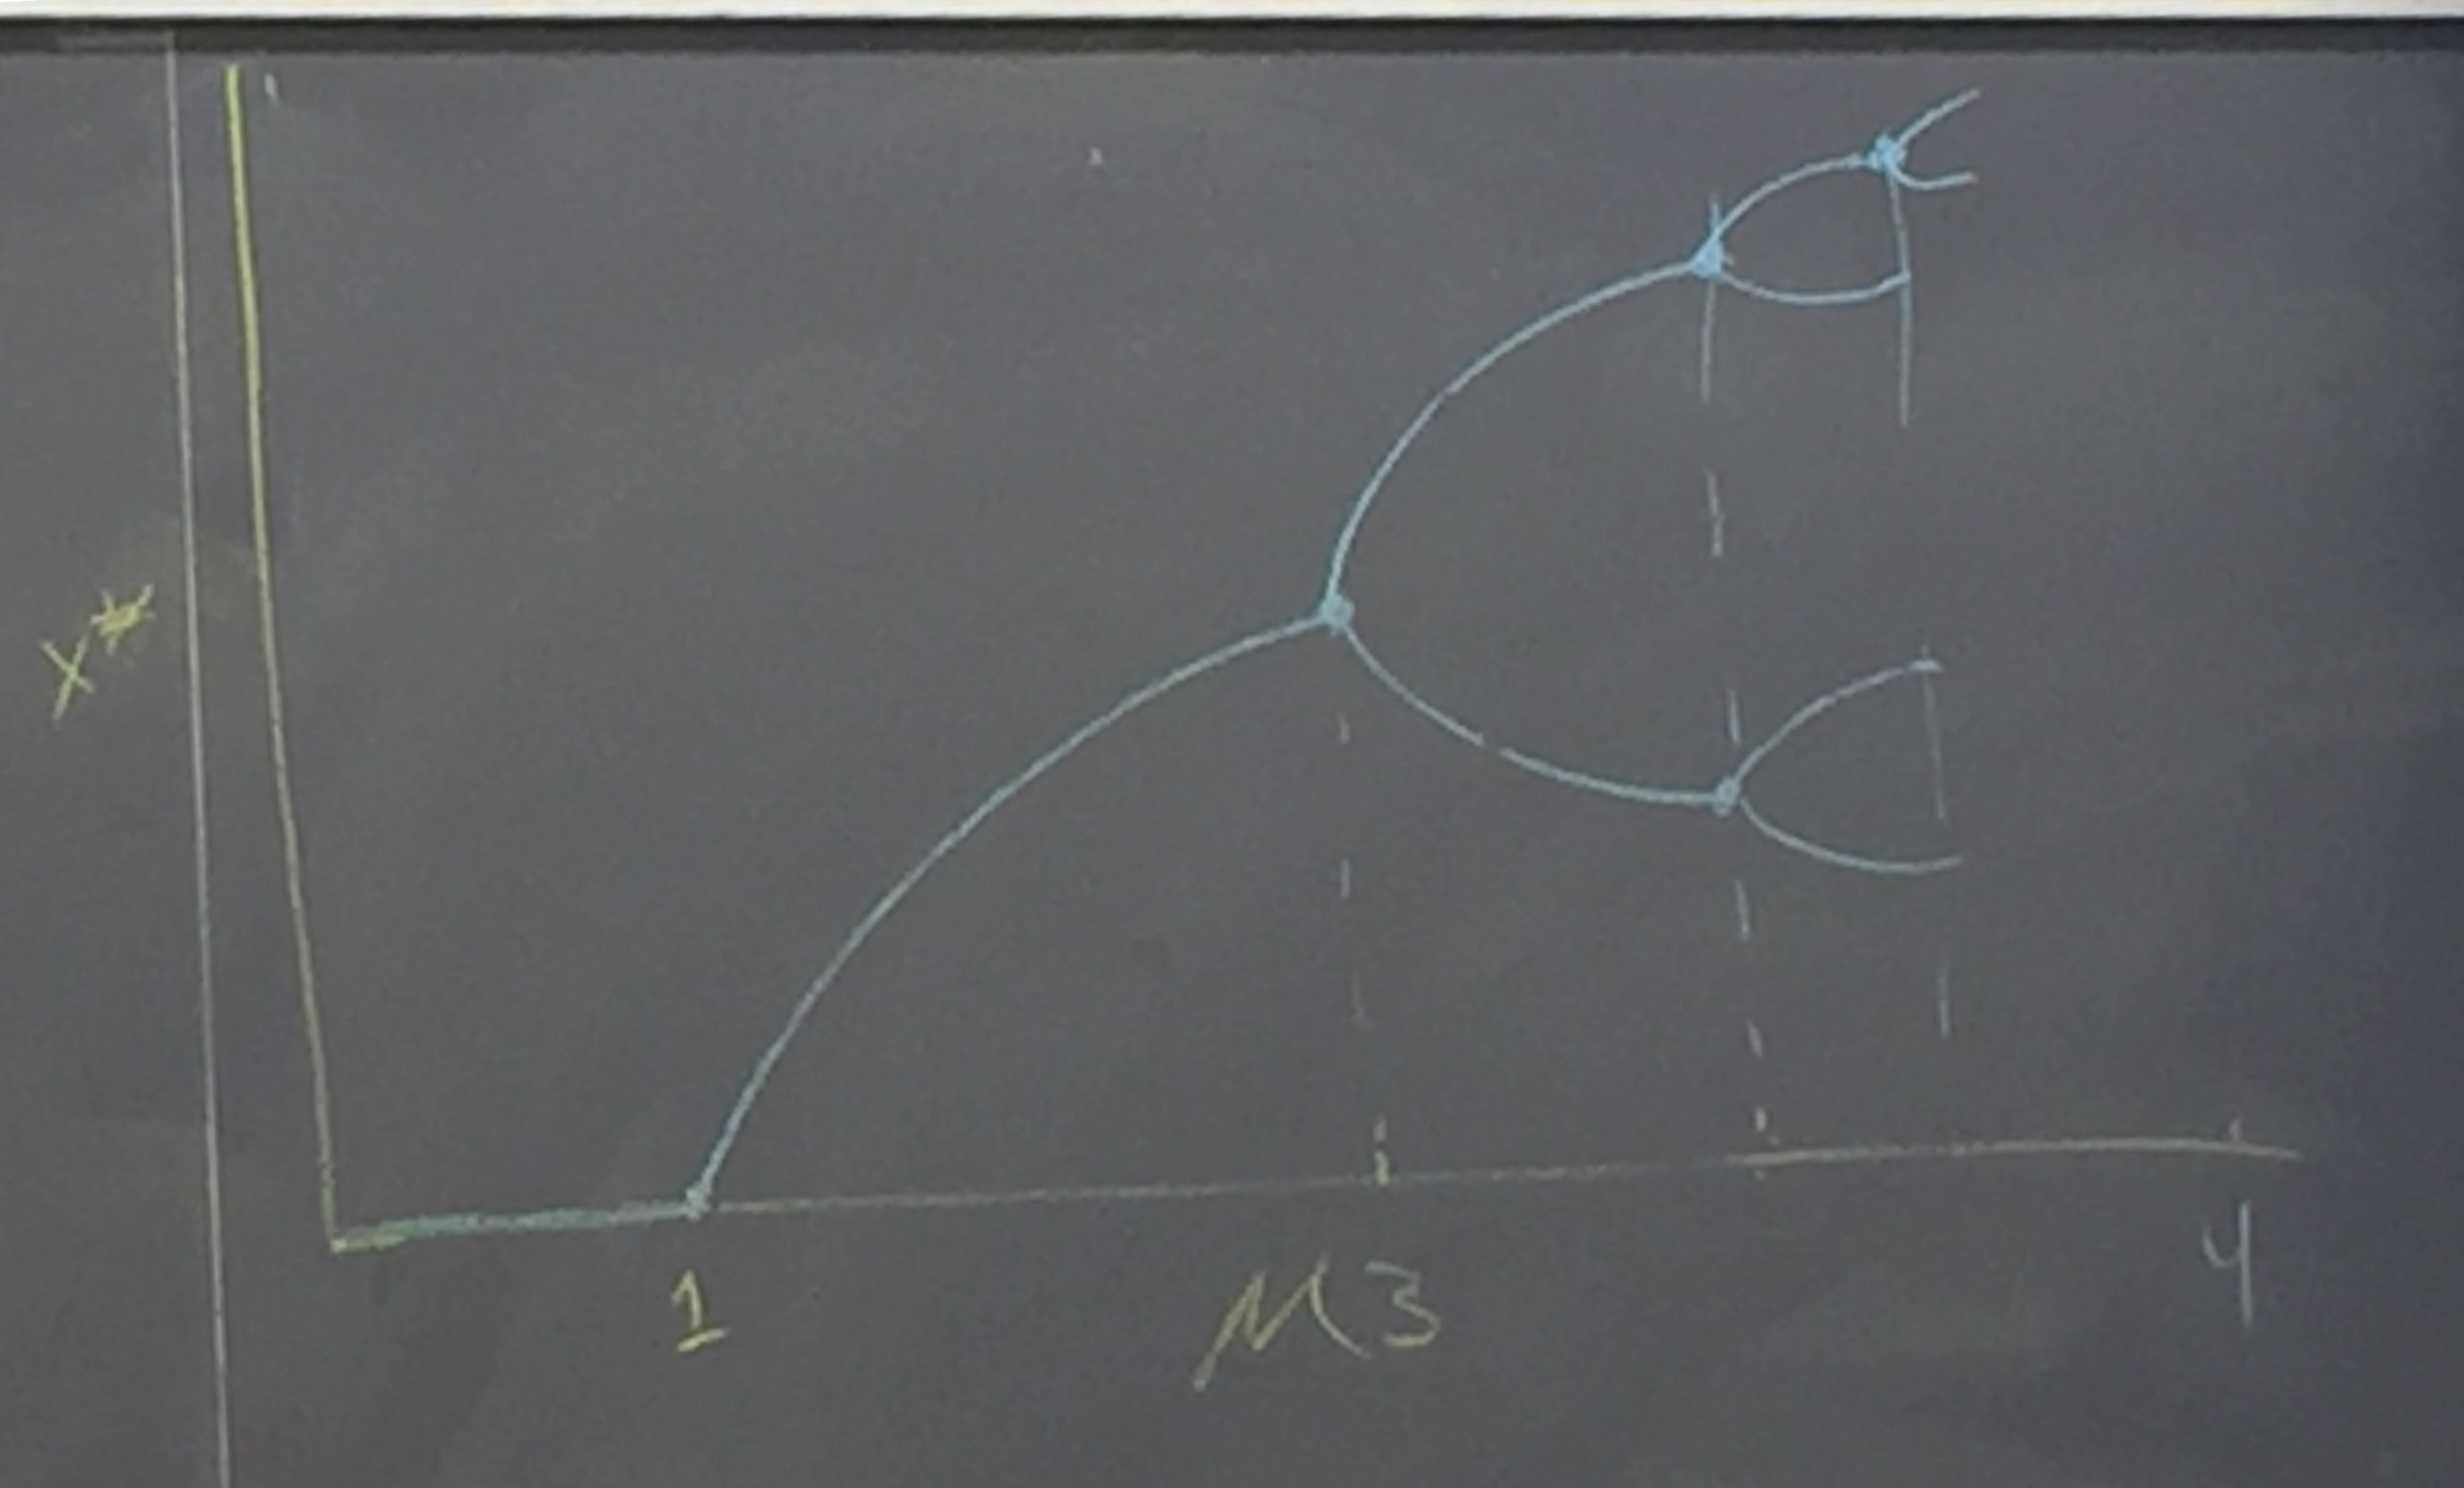

In [12]:
display(Image.open('IMG_1895.jpg'))

#### Lyapanov exponent 
$$\Delta x \approx Ce^{\lambda t}$$
two initial states $(x_0, x_0+\epsilon)$. after one iteration: 
$$\delta_1 = |f(x_0+\epsilon)-f(x)|\approx \epsilon \frac{df}{dx}|_{x_0} + \mathcal{O}(\epsilon^2)$$
$\Lambda$-iterations
$$\delta_\Lambda = |f^N(x_0+\epsilon)-f^n(\epsilon)| = \epsilon e^{n\lambda}$$
$$\lambda = \lim_{n\rightarrow \infty} \frac{1}{n} \ln \left( |\frac{f^n(x_0+\epsilon)-f^n(x)}{\epsilon} |\right)$$
$\epsilon\rightarrow 0$
$$\lambda = \lim_{n\rightarrow \infty} \frac{1}{n} \ln |\frac{df^n(x)}{dx}|_{x_0}$$
$$|\frac{df^n(x)}{dx}|_{x_0} = |\frac{df^n(x)}{dx}|_{x_{n-1}} |\frac{df^n(x)}{dx}|_{x_{n-2}}....|\frac{df^n(x)}{dx}|_{x_0}$$
$$=\Pi_{i=0}^{n-1} \frac{df}{dx}|_{x_i}$$
So,
$$\lambda = \lim_{n\rightarrow \infty} \frac{1}{n} \sum_{i=1}^{n-1} \ln \frac{df}{dx}|_{x_i}$$

In [1]:
%matplotlib notebook  
import matplotlib.pyplot as plt # for plotting          
import numpy as np
# import our Pendulum class from Particle1D
from Particle1D import Pendulum
import LogisticMap as lm


## Exercise
* Open the file `LogisticMap.py` in a text editor and examine the contents, make sure that you understand all of the components.

## The Logistic Map

* Run the code below and change the $\mu$ values to try to find stable fixed points of period 1T, 2T, 4T, and higher by adjusting the parameters $\mu$ and $x_0$.

<IPython.core.display.Javascript object>


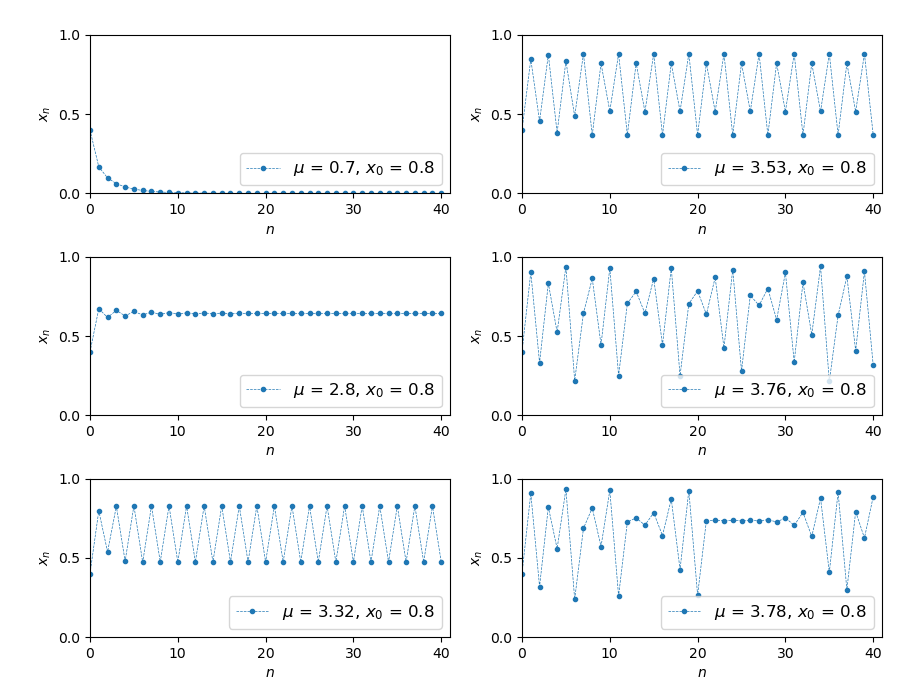

In [3]:
fig = plt.figure(figsize = [9,7])
axs = fig.subplots(3,2)
    
axs = list(axs.flatten())
mus = [0.7,3.53,2.8,3.76,3.32,3.78] 

max_steps = 40

for ii in range(6):

    m = lm.LogisticMap(0.4, mu = mus[ii])
    m.iterate(max_steps)

    axs[ii].plot(m.xList, ls = '--', marker = 'o', ms = 3, lw =0.5, label = "$\mu$ = {0}, $x_0$ = {1}".format(mus[ii], 0.8))
    axs[ii].set_ylabel('$x_n$')
    axs[ii].set_xlabel('$n$')
    axs[ii].legend(loc = 4,fontsize = 12)
    axs[ii].set_ylim([0,1])
    axs[ii].set_xlim([0,max_steps+1])
    axs[ii].set_yticks([0,0.5,1])
        
    
    fig.subplots_adjust(top = 0.95, bottom =0.09, left = 0.10, right =0.98, wspace = 0.2, hspace = 0.4)



## Period doubling and the logistic map

* Can you modify the code below to generate a bifrucation diagram? Hint: you will have to much data to efficiently plot if you just plot all points in a given time trace, and most of that is redundant! Look up the helpfile on the function `np.unique`.
* Try modifying the range of $\mu$ to create a higher point density in an interesting region and zoom in. How far can you zoom in?

<IPython.core.display.Javascript object>


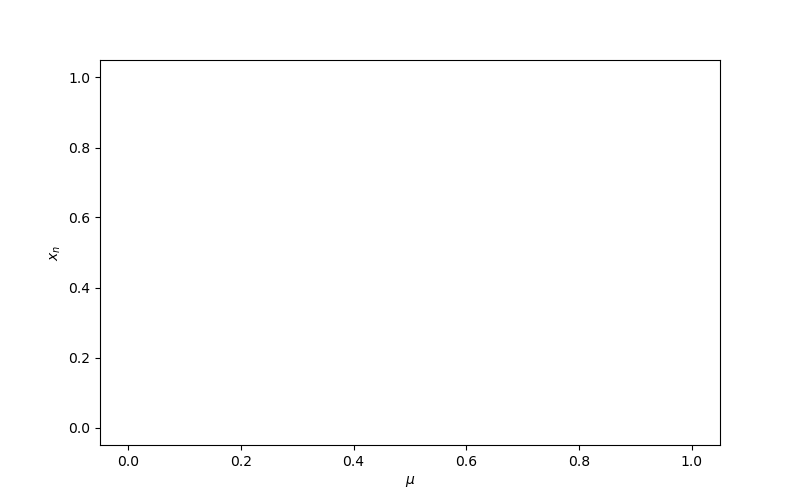

Text(0, 0.5, '$x_n$')

In [13]:
# Generate a bifrucation diagram
mu_start = 0
mu_stop = 4
mu_steps = 1000

x0 = 0.8 

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
mu_list = []
m_list = []
    
# loop over the mu values
for mu in mus:
    
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #select key points from time trace here
    

fig = plt.figure(figsize = [8,5])
ax = fig.add_subplot(111)
ax.plot(mu_list, m_list,'.', markersize = 0.5)
ax.set_xlabel('$\mu$')
ax.set_ylabel('$x_n$')


## Period doubling route to chaos and the Pendulum
* Explore the period doubling route to chaos in the non-linear damped driven pendulum using the code below. Try to follow the periodicity of the solution as the period successively increases.  You can explore the same phenomena for the logistic map by adjusting parameters for the plots above in the cell above this one.

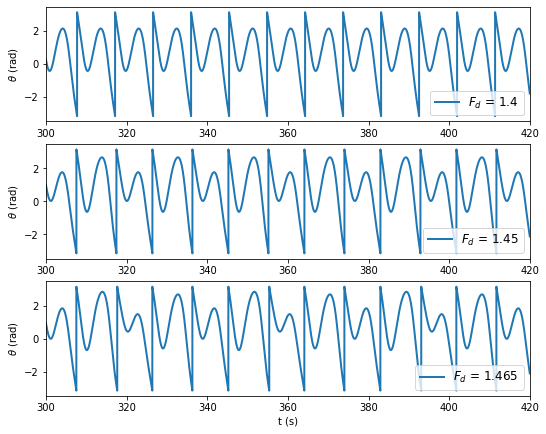

In [7]:
 # demonstate regime of chaotic behavior
fig = plt.figure(figsize = [8,6])
axs = fig.subplots(3,1)
    
Fds = [1.4,1.45,1.465] 

for ii in range(3):
    p = Pendulum(nu = 1/2, Fd = Fds[ii], omega_d = 2./3. , x0 = 0.200, v0 = 0, tf = 420)
    p.scipy_trajectory()

    axs[ii].plot(p.tarray, p.xv[:,0],lw = 2, label = "$F_d$ = {}".format(Fds[ii]))
    axs[ii].set_ylabel('$\\theta$ (rad)')
    axs[ii].legend(loc = 4, fontsize = 12)
    axs[ii].set_xlim([300,420])
        

    axs[-1].set_xlabel('t (s)')
    
fig.subplots_adjust(top = 0.98, bottom =0.08, left = 0.14, right =0.98)



## Exercise:
* Construct Poincare Maps for each of the above traces as you approach a chaotic solution. How many points should appear in each Poincare map for each solution with a given period n$\Omega_d$?

## Sensitivity to Initial Conditions

<IPython.core.display.Javascript object>


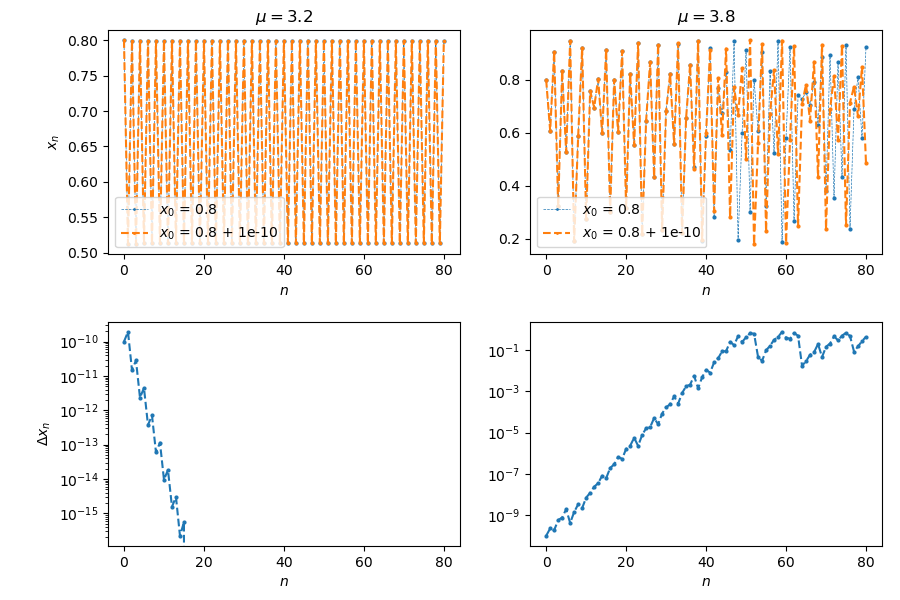

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
fig = plt.figure(figsize = [9,6])
axs = fig.subplots(2,2)
axs = axs.flatten(())

delta = 1e-10

m1 = lm.LogisticMap(0.8, mu = 3.2)
m1.iterate(80)
m2 = lm.LogisticMap(0.8+delta, mu = 3.2)
m2.iterate(80)
diff1 = np.abs(np.array(m1.xList) - np.array(m2.xList))

axs[0].plot(m1.xList, ls = '--', lw = 0.5, marker = 'o', ms = 2, label = "$x_0$ = 0.8")
axs[0].plot(m2.xList, ls = '--', marker = 's', ms = 2, label = "$x_0$ = 0.8 + 1e-10")
axs[2].semilogy(diff1, ls = '--', marker = 'o', ms = 2, label = "$\mu$ = 3.2")
    
m3 = lm.LogisticMap(0.8, mu = 3.8)
m3.iterate(80)    
m4 = lm.LogisticMap(0.8+delta, mu = 3.8)
m4.iterate(80)
diff2 = np.abs(np.array(m4.xList) - np.array(m3.xList))

axs[1].plot(m4.xList, ls = '--', lw = 0.5,  marker = 'o', ms = 2, label = "$x_0$ = 0.8")
axs[1].plot(m3.xList, ls = '--', marker = 'o', ms = 2, label = "$x_0$ = 0.8 + 1e-10")
axs[3].semilogy(diff2, ls = '--', marker = 'o', ms = 2, label = "$\mu$ = 3.8")

axs[0].set_ylabel('$x_n$')
axs[2].set_ylabel('$\Delta x_n$')
for ax in axs:
    ax.set_xlabel('$n$')
    

axs[0].set_title("$\mu = 3.2$")
axs[1].set_title("$\mu = 3.8$")
axs[0].legend(loc = 3,fontsize = 10, markerscale = 0.5)
axs[1].legend(loc = 3,fontsize = 10, markerscale = 0.5)
fig.subplots_adjust(top = 0.95, bottom =0.09, left = 0.12, right =0.98, wspace = 0.2, hspace = 0.3)

## Lyapunov Exponent for the logistic map

/home/jovyan/Lectures/LogisticMap.py:38: RuntimeWarning: divide by zero encountered in log
  lam += np.log(self.mu * abs(1.0 - 2.0 * x))


<IPython.core.display.Javascript object>


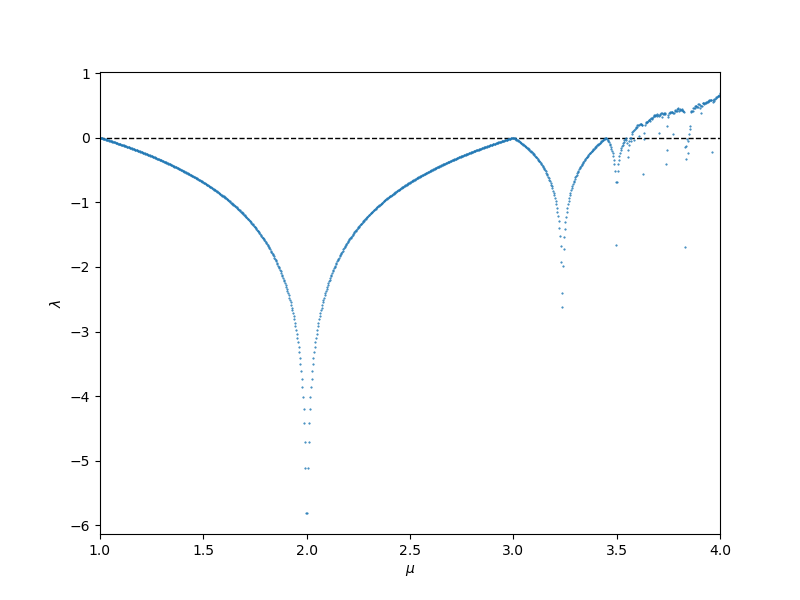

Text(0, 0.5, '$\\lambda$')

In [15]:
x0 = 0.4
mu_start = 1
mu_stop = 4
mu_steps = 1000
mus = np.linspace(mu_start, mu_stop, mu_steps)
 
lyapunov_list = [] 
for mu in mus:
    m = lm.LogisticMap(x0, mu = mu)
    l = m.lyapunov(1000, 200)
    lyapunov_list.append(l)

fig = plt.figure(figsize = [8,6])
ax = fig.add_subplot(111)
ax.plot(mus, lyapunov_list,'.', markersize = 1)
ax.hlines(0,0,4, LineStyles = '--', lw = 1,colors = 'k')
#ax.set_ylim([-2,1])
ax.set_xlim([mu_start, mu_stop])
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\lambda$')


## Exercise
* Explore the Lyapunov exponent for different values of $\mu$ and $x_0$. What happens to the trajectories right at the cusps of the Lyapunov exponent, for example at $\mu=2$? What about when $\lambda=0$?
* Can you numerically compute the Lyapunov exponent for a given $\mu$ and compare with the exact result?